In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [2]:
iris_dataset = load_iris()#データを抜き出す

X = pd.DataFrame(iris_dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],)# 特徴量をDF化
y = pd.DataFrame(iris_dataset.target, columns=['Species'])# ラベルをDF化
# virgicolorとvirginica　　df_s = df.sort_index()　　df_r = df.reset_index()
y = y.iloc[50:].sort_index()
X = X.iloc[50:].sort_index()
# インデックスを振りなおし、ラベルを0、１に変換
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
y = y.replace(1, 0)
y = y.replace(2, 1)

# display(X.head())
# display(y)
df = pd.concat([X, y], axis=1)
display(df.head())
display(df.tail())

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75)
#　標準化する
scaler = StandardScaler()
scaler.fit(X_train)
# 標準化変形する

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)


,sepal_length,sepal_width,petal_length,petal_width,Species
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


,sepal_length,sepal_width,petal_length,petal_width,Species
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1
99,5.9,3.0,5.1,1.8,1


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
def sigoid(z):
    '''
    シグモイド関数
    
    Parameter
    -------------
    z : ndarray, shape (n_samples, 1)
    
    Rerurn
    -------------
    シグモイド関数
    '''
    return 1/ (1 + np.exp(-z))

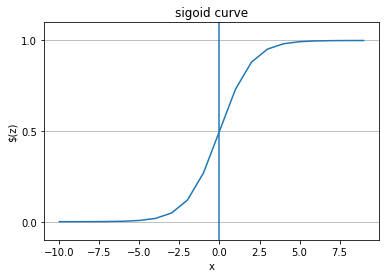

In [4]:
# -10~10のnumpy配列
z = np.arange(-10, 10)
#sigmoid(z)
sig_z = sigoid(z)
#sigmoid_curve_plot
plt.plot(z, sig_z)
plt.axvline(0)
plt.ylim(-0.1, 1.1)
plt.title('sigoid curve')
plt.xlabel('x')
plt.ylabel('$(z)')
plt.yticks([0, 0.5, 1])
plt.gca().yaxis.grid(True)
plt.show()

In [5]:
#確認用theta
theta_0 = np.arange(1, 5)
print(X_train_transformed.shape)
print(theta_0)

th = np.dot(X_train, theta_0)
print(th.shape)
th = th[:, np.newaxis]
print(th.shape)
print(y_train.shape)
print(th.ndim)
print(y_train.ndim)

(75, 4)
[1 2 3 4]
(75,)
(75, 1)
(75, 1)
2
2


In [6]:

j = np.copy(theta_0[np.newaxis, :])

In [7]:
reg = np.hstack([[0, j[1:]]])
print(j)

[[1 2 3 4]]


In [8]:
# 正則化項の確認(バイアス項は正則化を適用しないので0にする。)
reg = 1 * np.hstack([0, theta_0[1:]])
print(reg)

[0 2 3 4]


In [9]:
 cost = _target_function(X, y, y_hat)
print(cost)
self.loss[i] += cost

NameError: name '_target_function' is not defined

In [ ]:
theta = np.arange(X.shape[1])[np.newaxis, :]
theta = theta.T
print(theta.shape)

In [ ]:
# sigmoid関数
x_sig = np.dot(X_train_transformed, theta_0.T) # n_sample * 1
g_z = 1 / (1 + np.exp(-x_sig)) # 0~1を返す
print(x_sig.shape)
#print(x_sig)
print(g_z)

In [ ]:
avatar = np.copy(theta_0) #(n_feature, 1)
error = x_sig[:, np.newaxis] - y_train # (n_samples, )
m = X_train.shape[0] # Xのn_samples(yの要素数)
g_d_1 = np.dot(error.T, X_train) # (n_samples, )
reg_term = (1/m) * np.hstack([0, theta_0[1:]]) #正則化項　(n_samples, 1)
        
coef = theta_0 - (0.01 / m) * g_d_1 - reg_term
print(coef)

In [ ]:
avatar = np.copy(theta_0) #(n_feature, 1)
avatar[0] = 0
error = x_sig[:, np.newaxis] - y_train # (n_samples, 1)
m = X_train_transformed.shape[0] 
g_d_1 = np.dot(error.T, X_train_transformed) # (1, n_samples )
regural = (1/m) * theta_0.T #正則化項(n_samples, 1)
        
theta = theta_0 - (1 / m) * g_d_1 - (1 / m) * avatar
print(theta)

In [ ]:
    #def _target_function(self, X, y, y_hat): # 目的関数(損失関数）
Lambda = 1
m = len(y_train) # 要素数(n_samples)
avatar = np.copy(theta_0) #(n_feature, 1)
        
#avatarの0番目に0を代入
# 正則化項の確認(バイアス項は正則化を適用しないので0にする。)
reg_0 = np.hstack([0, avatar[1:]])
reg_term_1 = (Lambda/2*m)*np.sum(reg_0**2) #(n_features, )

step1 = -y_train.T@np.log(g_z)
step2 = 1 - y_train
step3 = np.log(1 - g_z)

objective_function = ((step1 - step2.T@step3)/m ) + reg_term_1

print(objective_function)

In [ ]:
iter = 3000
loss = np.zeros(iter)
print(loss[5])
print(type(loss))

In [ ]:
cost = objective_function
print(type(cost))
loss[0] += cost

In [ ]:
z = np.array([1, 2, 4, 5])
print(z.shape)
z = z[:, np.newaxis]
print(z)

In [ ]:
def _target_function(self, X, y, y_hat, Lambda): # 目的関数(損失関数）
        
        m = len(y) # 要素数(n_samples)
        avatar = np.copy(self.coef_) #(n_feature, 1)
        #avatarの0番目に0を代入
        # 正則化項の確認(バイアス項は正則化を適用しないので0にする。)
        reg_term = (self.Lambda/m) * np.hstack([0, avatar[1:]]) #(1, n_features)
        
        step1 = -y.T@np.log(y_hat)
        step2 = 1 - y# 
        step3 = np.log(1 - y_hat)
        
        
        objective_function = (1/m )* (step1 - step2.T@step3).values + self.reg_term
        
        return objective_function

In [ ]:
# blog
def h(X,theta) :
    return 1/(1+np.exp(-(np.dot(X,theta))))

def grad_desc(theta,alpha,itera,X,y):
    m = len(y)
    cost = np.zeros(itera)
    
    for i in range(itera):
        cost[i] = -1*(1/m)*np.sum(y*np.log(h(X,theta))+(1-y)*np.log(1-h(X,theta)))
        theta = theta - alpha*(1/m)*np.dot(X.T,(h(X,theta)-y))
    return [cost,theta]

In [ ]:
# blog
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

def CostFunction(theta, X, y):
    m = len(y) # 要素数(n_samples, 1)
    h = sigmoid(X.dot(theta)) # 予測関数(1, n_features )
    self.reg_term # 正則化項
    
    
    
    cost = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))

    return j

In [ ]:
Lambda = 1
avatar = np.copy(theta_0) #(n_feature, 1)

In [ ]:
reg_term = (Lambda/X_train_transformed.shape[0]) * np.hstack([0, avatar[1:]])
print(reg_term.shape)
print(reg_term)

In [ ]:

plt.scatter((df.iloc[:50, 0]), (df.iloc[:50, 2]), label='0') #label=0, SepalLength * PetalLength
plt.scatter((df.iloc[50:, 0]), (df.iloc[50:, 2]), label='1') #label=1, SepalLength * PetalLength

plt.xlabel("Sepal_length", fontsize=15)
plt.ylabel("Petal_length", fontsize=15)
plt.legend()

plt.show()

In [ ]:
plt.scatter((df.iloc[:50, 1]), (df.iloc[:50, 2]), label='0') #label=0, SepalWidth *PetalLength
plt.scatter((df.iloc[50:, 1]), (df.iloc[50:, 2]), label='1') #label=1, SepalWidth *PetalLength

plt.xlabel("sepal_width", fontsize=15)
plt.ylabel("petal_length", fontsize=15)
plt.legend()

plt.show()